In [47]:
using AlgebraOfGraphics
using AlgebraOfGraphics: density
using CairoMakie
using DataFrames
using DataFramesMeta
using Arrow
using PartialFunctions

set_aog_theme!()

In [48]:
include("utils.jl")

draw! (generic function with 3 methods)

In [49]:
function load(path::String)
    df = path |> Arrow.Table |> DataFrame |> dropmissing

    # Iterate through each column in the DataFrame
    filter(row -> all(x -> !(x isa Number && isnan(x)), row), df)
end

begin
    enc = "enc2" # event id (encounter id)
    psp_p_instr = "spc_n_sqtn"
    dir = "../data"
    fig_dir = "../figures"
    fmt = "arrow"

    path01 = "$dir/psp_ids_dataset_$(enc)_$(psp_p_instr).$fmt"
    path03 = "$dir/wind_ids_dataset_$(enc)_r.$fmt"

    psp_df = load(path01)
    wind_df = load(path03)

    # path02 = "$dir/psp_ids_dataset_$(enc)_$(psp_p_instr)_r.$fmt"
    # psp_df_r = load(path02)

    mkpath("$fig_dir/$enc")
end
# psp_df = Dataset("../data/psp_ids_dataset.parquet")

"../figures/enc2"

In [50]:
function process(df)
    @chain df begin
        @transform :"n.mean" = (:"n.before" .+ :"n.after") ./ 2
        @transform :"B.mean" = (:"B.before" .+ :"B.after") ./ 2
        @transform :"T.mean" = (:"T.before" .+ :"T.after") ./ 2
        @transform :"v.Alfven.change.l" = abs.(:"v.Alfven.change.l")
        @transform :"v.ion.change.l" = abs.(:"v.ion.change.l")
        @transform :Λ = 1 .- (:"v.ion.change.l" ./ :"v.Alfven.change.l").^2
    end
end

begin
    # concat dataframe with add column dataset to identify the dataset
    psp_df[!, :dataset] .= "Parker Solar Probe"
    wind_df[!, :dataset] .= "Wind"

    psp_df = process(psp_df)
    # process!(psp_df)
    wind_df = process(wind_df)

    df = vcat(psp_df, wind_df, cols=:intersect)

    # psp_df_r[!, :dataset] .= "PSP (Low Res)"
    # process!(psp_df_r)
    # df = vcat(psp_df, psp_df_r, wind_df, cols=:intersect)
end

Row,time,tstart,tstop,index_diff,index_std,index_fluctuation,B.after,B.before,b_mag,b_n,bn_over_b,d_star,db_mag,db_over_b,db_over_b_max,fit.stat.chisqr,fit.stat.rsquared,fit.vars.amplitude,fit.vars.c,fit.vars.sigma,rotation_angle,dB_x,dB_y,dB_z,dB_lmn_x,dB_lmn_y,dB_lmn_z,k_x,k_y,k_z,Vl_x,Vl_y,Vl_z,Vn_x,Vn_y,Vn_z,duration,plasma_density,plasma_temperature,plasma_speed,n.before,v.ion.before,T.before,n.after,v.ion.after,T.after,v_l,v_n,v_k,v_mn,L_k,j0_k,ion_inertial_length,Alfven_speed,j_Alfven,L_k_norm,j0_k_norm,v.ion.before.l,v.ion.after.l,B.vec.before.l,B.vec.before.m,B.vec.before.n,B.vec.after.l,B.vec.after.m,B.vec.after.n,T.change,v.Alfven.before,v.Alfven.after,v.Alfven.before.l,v.Alfven.after.l,n.change,v.ion.change,v.ion.change.l,B.change,v.Alfven.change,v.Alfven.change.l,dataset,n.mean,B.mean,T.mean,Λ
,DateTime,DateTime,DateTime,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Any,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String,Float64,Float64,Float64,Float64
1,2019-04-07T01:05:28,2019-04-07T01:05:20,2019-04-07T01:05:36,0.944808,3.5346,2.11902,86.0953,85.8251,83.948,-29.6779,-0.353527,41.6615,0.270148,0.00321804,0.0644423,17579.9,0.968514,112.521,-68.1444,0.675208,77.6173,-14.6004,-95.2183,48.2659,-107.143,4.58827,-10.425,0.202384,0.417906,0.885661,-0.152984,-0.923615,0.351471,0.536918,0.220902,0.8142,1.35042,129.863,62.5883,423.72,132.596,413.544,62.9306,127.356,347.962,43.639,-185.014,207.437,91.7636,381.194,123.919,361.289,19.9838,160.637,3342.27,6.20097,0.108097,-160.4,-68.162,-53.5745,-59.8183,-30.2902,53.5683,-64.4066,-19.8652,-19.2916,162.527,166.359,-101.454,103.508,-5.24002,-65.5817,92.2384,0.270148,3.83185,204.962,Parker Solar Probe,129.976,85.9602,53.2848,0.797477
2,2019-04-07T01:08:48,2019-04-07T01:08:40,2019-04-07T01:08:56,0.589771,3.09237,1.30328,85.5573,84.8541,83.0456,-1.96654,-0.0236802,-154.819,0.703153,0.00846707,0.0660076,342.853,0.998092,-102.153,53.5641,0.164954,68.1301,33.9073,-89.1205,-4.41397,95.1664,-0.158737,-7.41415,0.394252,0.10478,0.91301,-0.324368,0.938613,0.117434,0.427871,0.034866,0.903167,0.329909,141.062,35.6842,351.696,141.062,356.742,41.9473,141.062,363.015,52.7415,-84.1487,188.912,179.399,341.481,59.1852,-686.747,19.1742,152.472,3445.96,3.08671,-0.199291,-61.6221,-63.1158,47.0283,70.5011,-4.26076,-48.1382,70.6599,3.15339,10.7942,155.792,157.083,86.344,-88.3818,0.0,6.2726,1.49374,0.703153,1.29099,174.726,Parker Solar Probe,141.062,85.2057,47.3444,0.999927
3,2019-04-07T01:12:00,2019-04-07T01:11:52,2019-04-07T01:12:08,1.12176,2.99936,2.16551,86.4523,91.017,84.5801,32.9812,0.389941,-110.576,-4.56464,0.0539683,0.124342,47247.9,0.94932,-114.821,47.4078,0.259598,116.907,-99.8931,84.2325,-76.1983,149.604,21.8416,-4.6495,0.133463,-0.57313,-0.808523,0.566087,-0.668852,0.481854,-0.596298,0.0713561,0.799586,0.519195,148.382,93.6622,502.914,148.407,507.291,92.4619,145.567,455.391,67.2478,322.021,236.466,8.80904,386.297,4.57362,-9989.0,18.6952,151.41,3599.54,0.244641,-2.77508,321.54,355.042,83.4973,-23.7821,27.3258,-66.1064,-45.6237,31.9753,-25.2141,162.919,156.251,149.459,-119.478,-2.84003,-51.9009,33.5029,-4.56464,-6.66836,268.938,Parker Solar Probe,146.987,88.7346,79.8548,0.984481
4,2019-04-07T01:30:40,2019-04-07T01:30:32,2019-04-07T01:30:48,0.654467,2.59422,1.91444,85.6411,91.1417,85.8165,-17.8541,-0.20805,-94.6558,-5.50055,0.0640966,0.0902627,33445.6,0.940607,-90.4439,56.9176,0.238876,69.1174,-78.4386,30.3284,-54.8104,100.25,-1.89566,4.78623,0.252737,-0.646785,-0.719578,0.797589,-0.329117,0.505504,-0.0807917,0.772197

In [51]:
data_layer_a = (data(psp_df) + data(wind_df) * visual(alpha=0.3)) * mapping(color=:dataset, marker=:dataset)

Layers(Layer[Layer(identity, 27×97 DataFrameColumns
 Row │ time                 tstart               tstop                t.d_end  ⋯
     │ DateTime             DateTime             DateTime             DateTime ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2019-04-07T01:05:28  2019-04-07T01:05:20  2019-04-07T01:05:36  2019-04- ⋯
   2 │ 2019-04-07T01:08:48  2019-04-07T01:08:40  2019-04-07T01:08:56  2019-04-
   3 │ 2019-04-07T01:12:00  2019-04-07T01:11:52  2019-04-07T01:12:08  2019-04-
   4 │ 2019-04-07T01:30:40  2019-04-07T01:30:32  2019-04-07T01:30:48  2019-04-
   5 │ 2019-04-07T01:33:44  2019-04-07T01:33:36  2019-04-07T01:33:52  2019-04- ⋯
   6 │ 2019-04-07T02:04:08  2019-04-07T02:04:00  2019-04-07T02:04:16  2019-04-
   7 │ 2019-04-07T02:46:16  2019-04-07T02:46:08  2019-04-07T02:46:24  2019-04-
   8 │ 2019-04-07T03:12:00  2019-04-07T03:11:52  2019-04-07T03:12:08  2019-04-
  ⋮  │          ⋮                    ⋮                    ⋮          

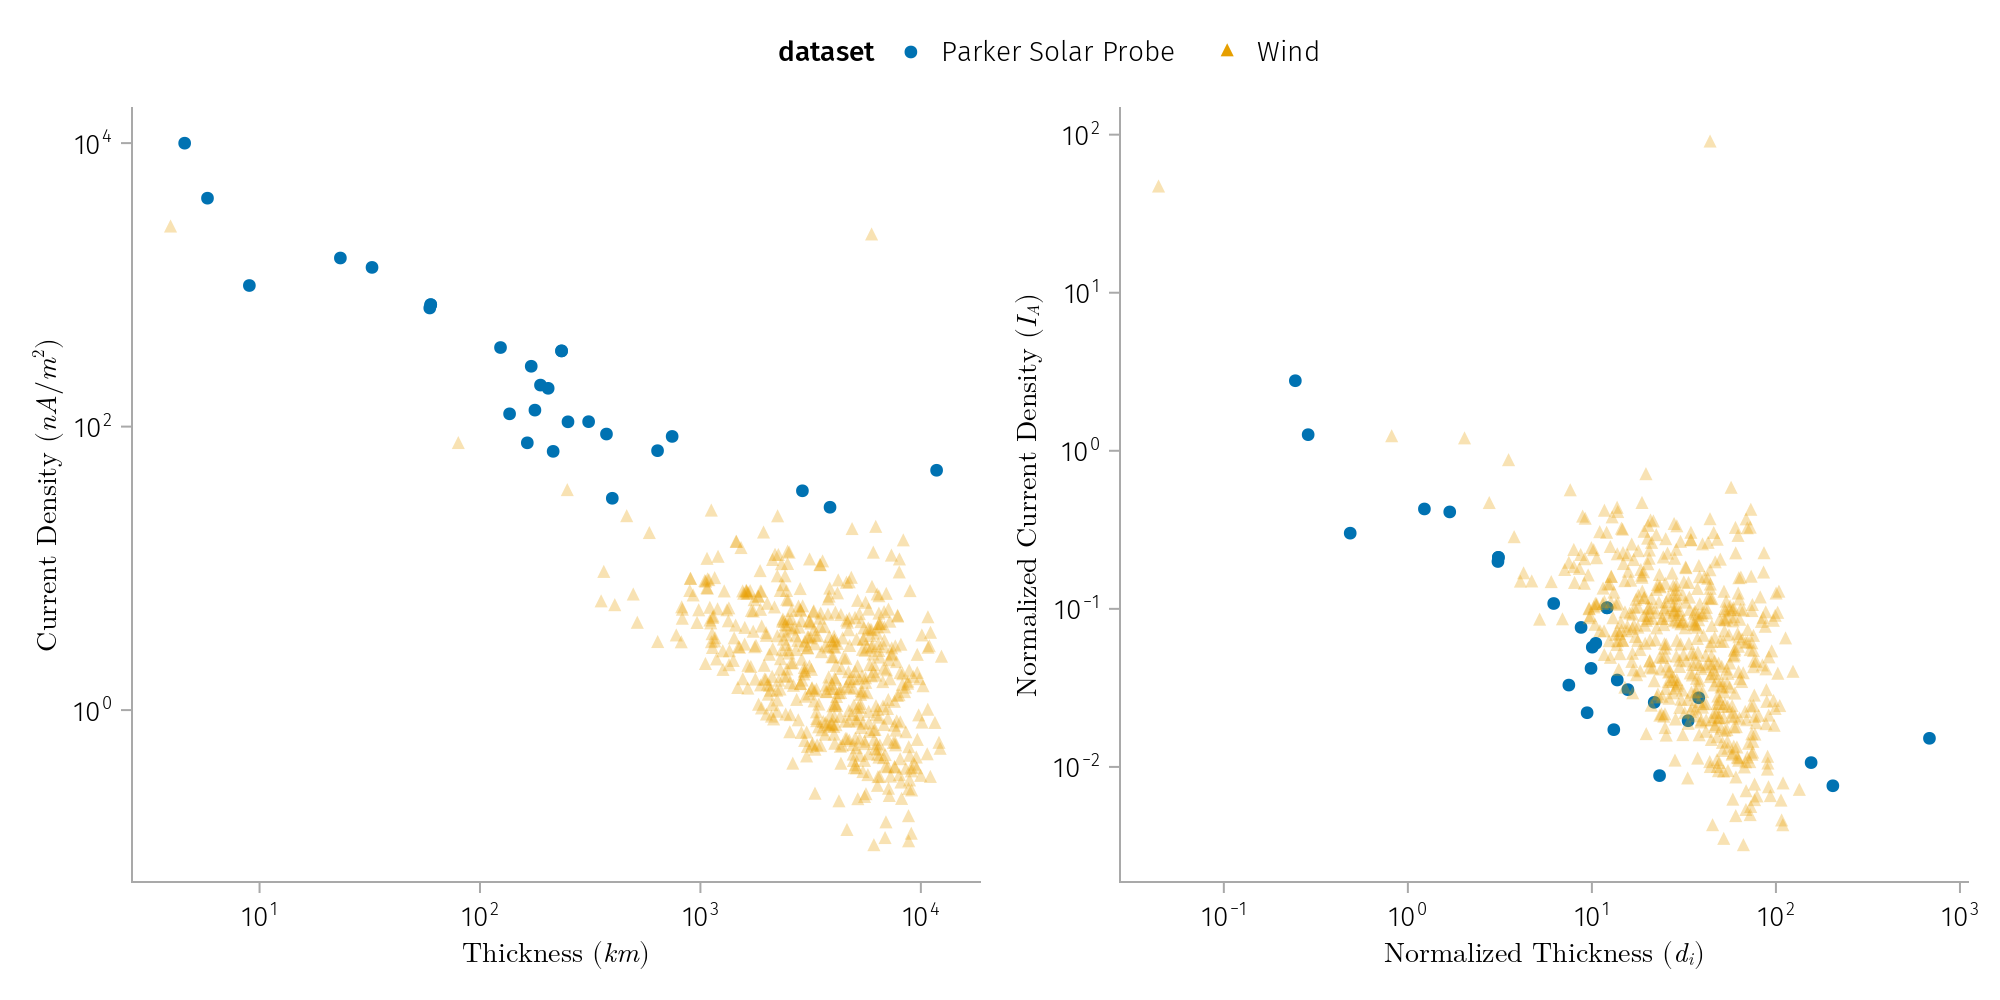

In [52]:
begin
    j_label = L"Current Density ($nA/m^2$)"
    j_norm_label = L"Normalized Current Density ($I_A$)"
    l_label = L"Thickness ($km$)"
    l_norm_label = L"Normalized Thickness ($d_i$)"

    thickness_map = :L_k => l_label
    thickness_norm_map = :L_k_norm => abs => l_norm_label
    current_map = :j0_k => abs => j_label
    current_norm_map = :j0_k_norm => abs => j_norm_label

    # data_layer_a = (data(psp_df) + data(psp_df_r) * visual(alpha=0.6) + data(wind_df) * visual(alpha=0.3)) * mapping(color=:dataset, marker=:dataset)
    plt = data_layer_a * visual(Scatter)

    fig = Figure(size=(1000, 500))
    axis = log_axis

    grid1 = plt * mapping(thickness_map, current_map) |> draw!(fig[2, 1]; axis=axis)
    grid2 = plt * mapping(thickness_norm_map, current_norm_map) |> draw!(fig[2, 2]; axis=axis)

    pretty_legend!(fig, grid1)
    # easy_save("thickness_current_$psp_p_instr")

    fig
end

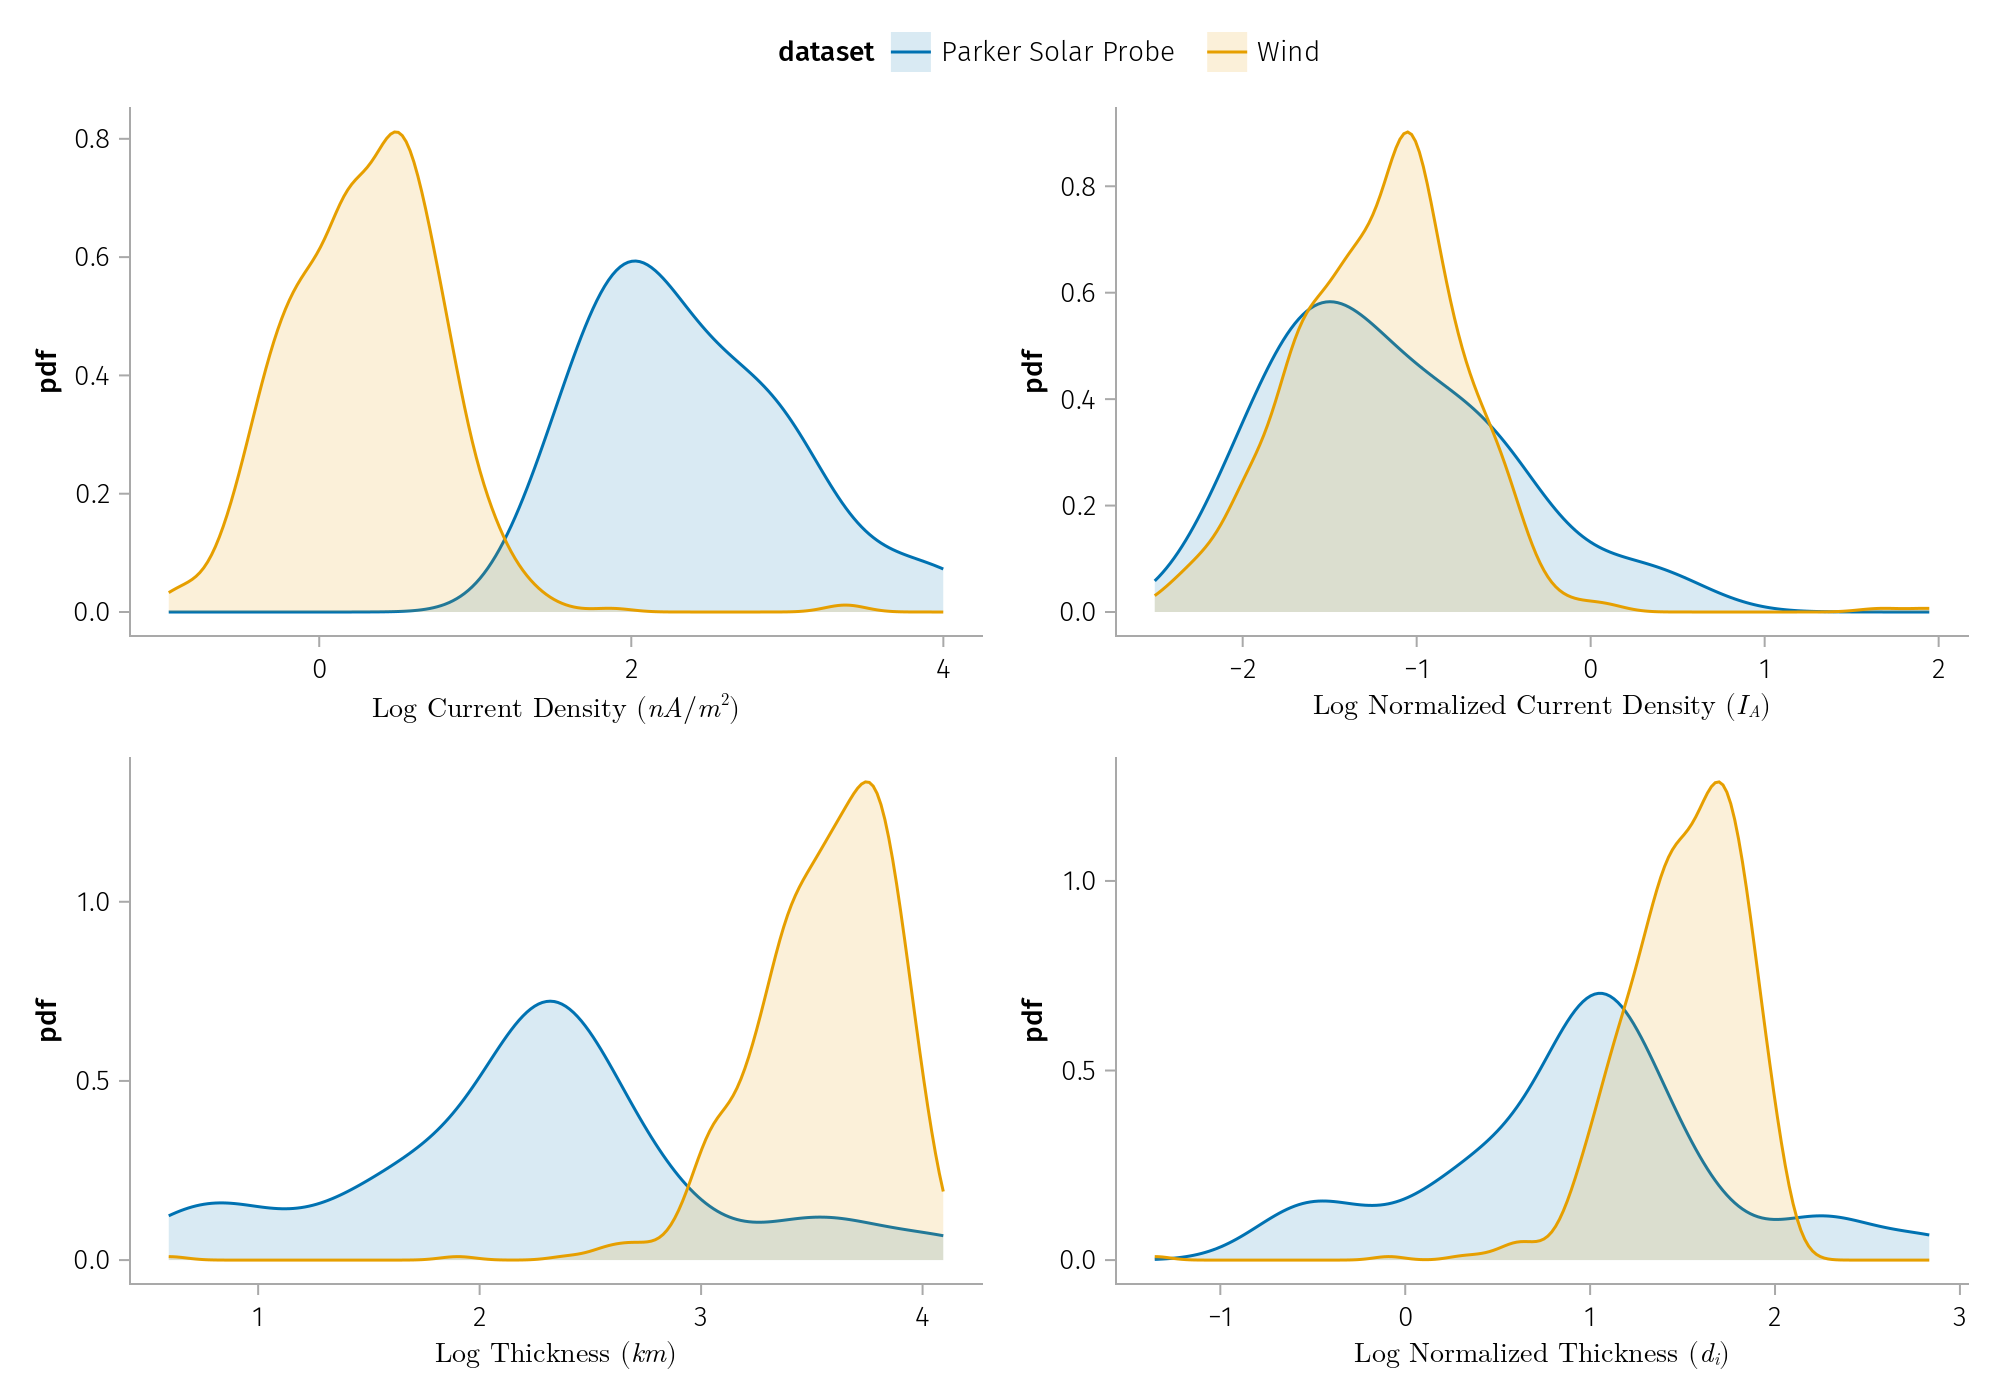

In [53]:
# plot the density distribution of the thickness and current density
begin
    fname = "density_distribution"

    data_layer = data(df) * mapping(color=:dataset, marker=:dataset)
    plt = data_layer * density()

    fig = Figure(size=(1000, 700))
    mapping_layer_j = mapping(:j0_k => log10 ∘ abs => L"Log %$(j_label)")
    mapping_layer_j_norm = mapping(:j0_k_norm => log10 ∘ abs => L"Log %$(j_norm_label)")

    mapping_layer_l = mapping(:L_k => log10 ∘ abs => L"Log %$(l_label)")
    mapping_layer_l_norm = mapping(:L_k_norm => log10 ∘ abs => L"Log %$(l_norm_label)")

    grid = draw!(fig[2, 1], plt * mapping_layer_j)
    plt * mapping_layer_j_norm |> draw!(fig[2, 2])
    plt * mapping_layer_l |> draw!(fig[3, 1])
    plt * mapping_layer_l_norm |> draw!(fig[3, 2])

    pretty_legend!(fig, grid)

    # easy_save("$(fname)_$psp_p_instr")

    fig

end

In [54]:
dn_over_n = ("n.change", "n.mean") => (/) => L"\Delta n/n"
dB_over_B = ("B.change", "b_mag") => (/) => L"\Delta B/B"
dT_over_T = ("T.change", "T.mean") => (/) => L"\Delta T/T"

("T.change", "T.mean") => ((/) => L"$\Delta T/T$")

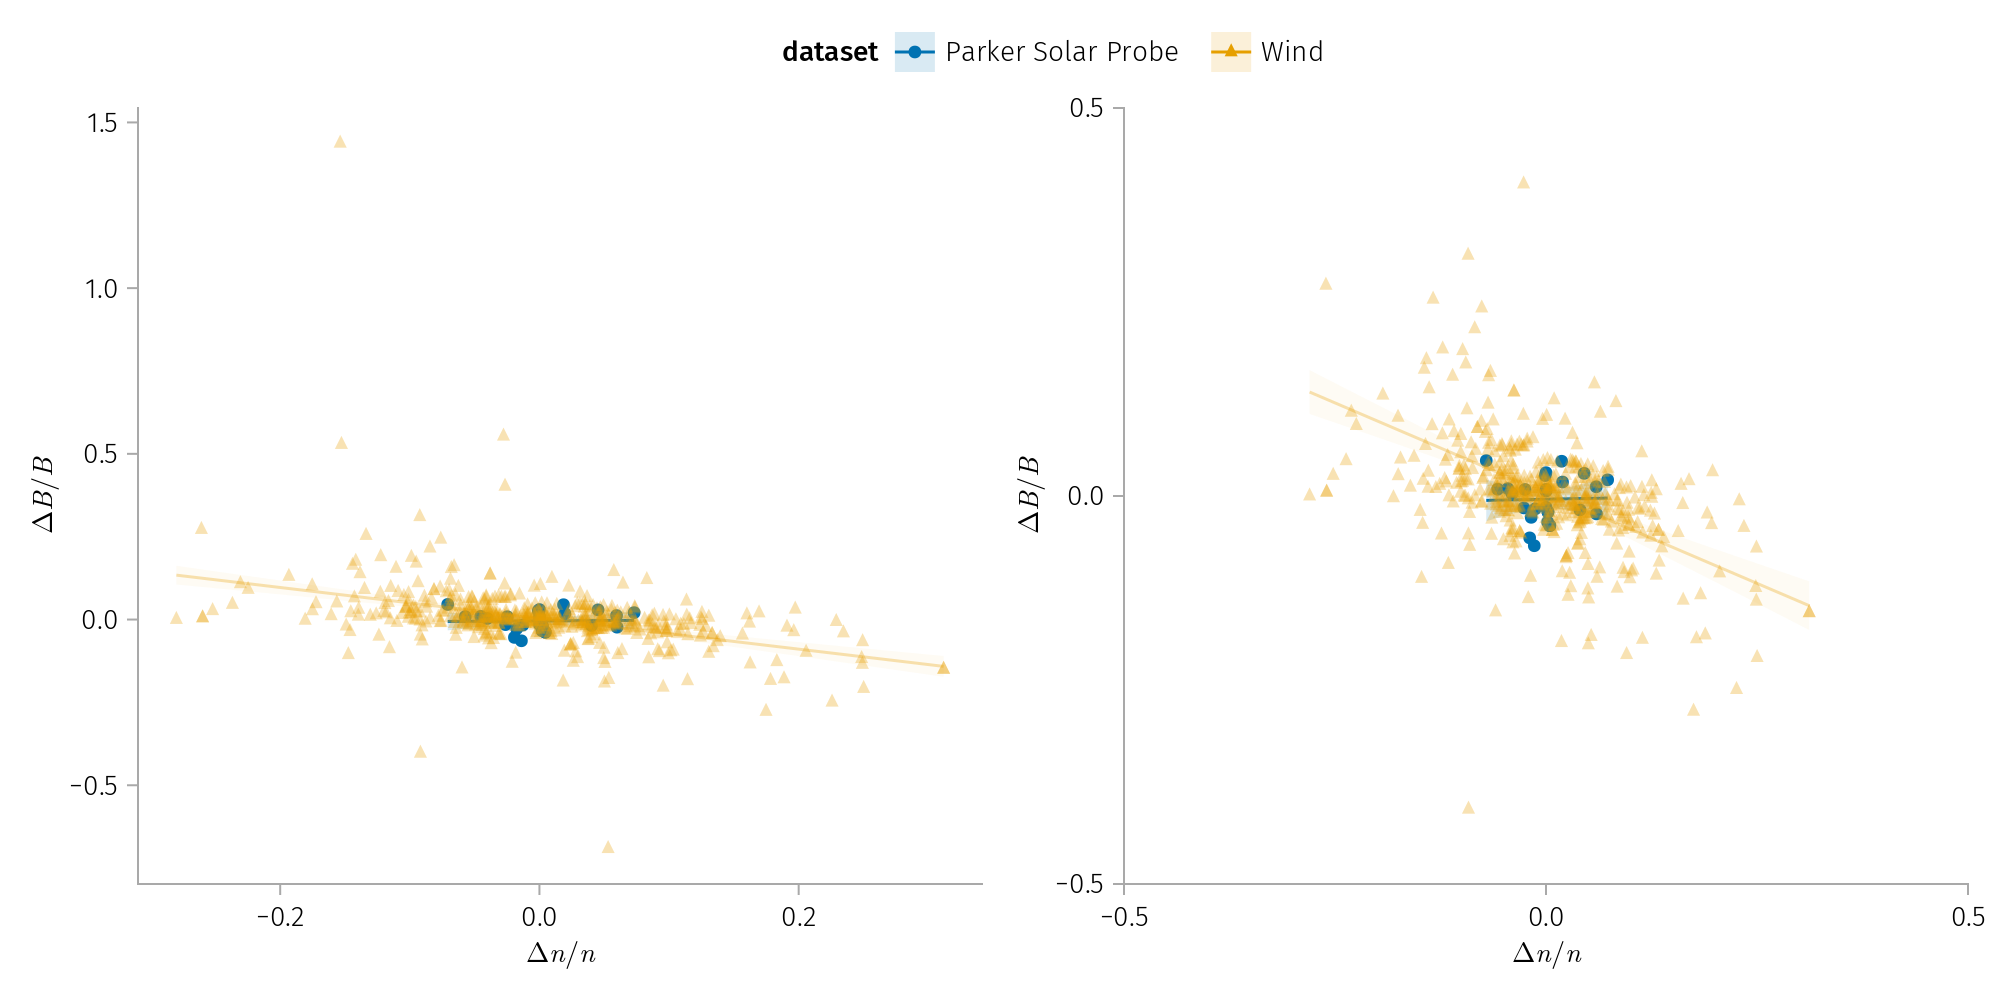

In [55]:
#| label: fig-dn-dB
#| column: screen
begin
    fname = "dn-dB"
    plt = data_layer_a * mapping(dn_over_n, dB_over_B) * (linear() + mapping())

    fig = Figure(size=(1000, 500))
    grid1 = plt |> draw!(fig[2, 1])
    grid2 = plt |> draw!(fig[2, 2], axis=(; limits=((-0.5, 0.5), (-0.5, 0.5))))
    
    pretty_legend!(fig, grid1)
    easy_save("$(fname)_$psp_p_instr")

    fig
end

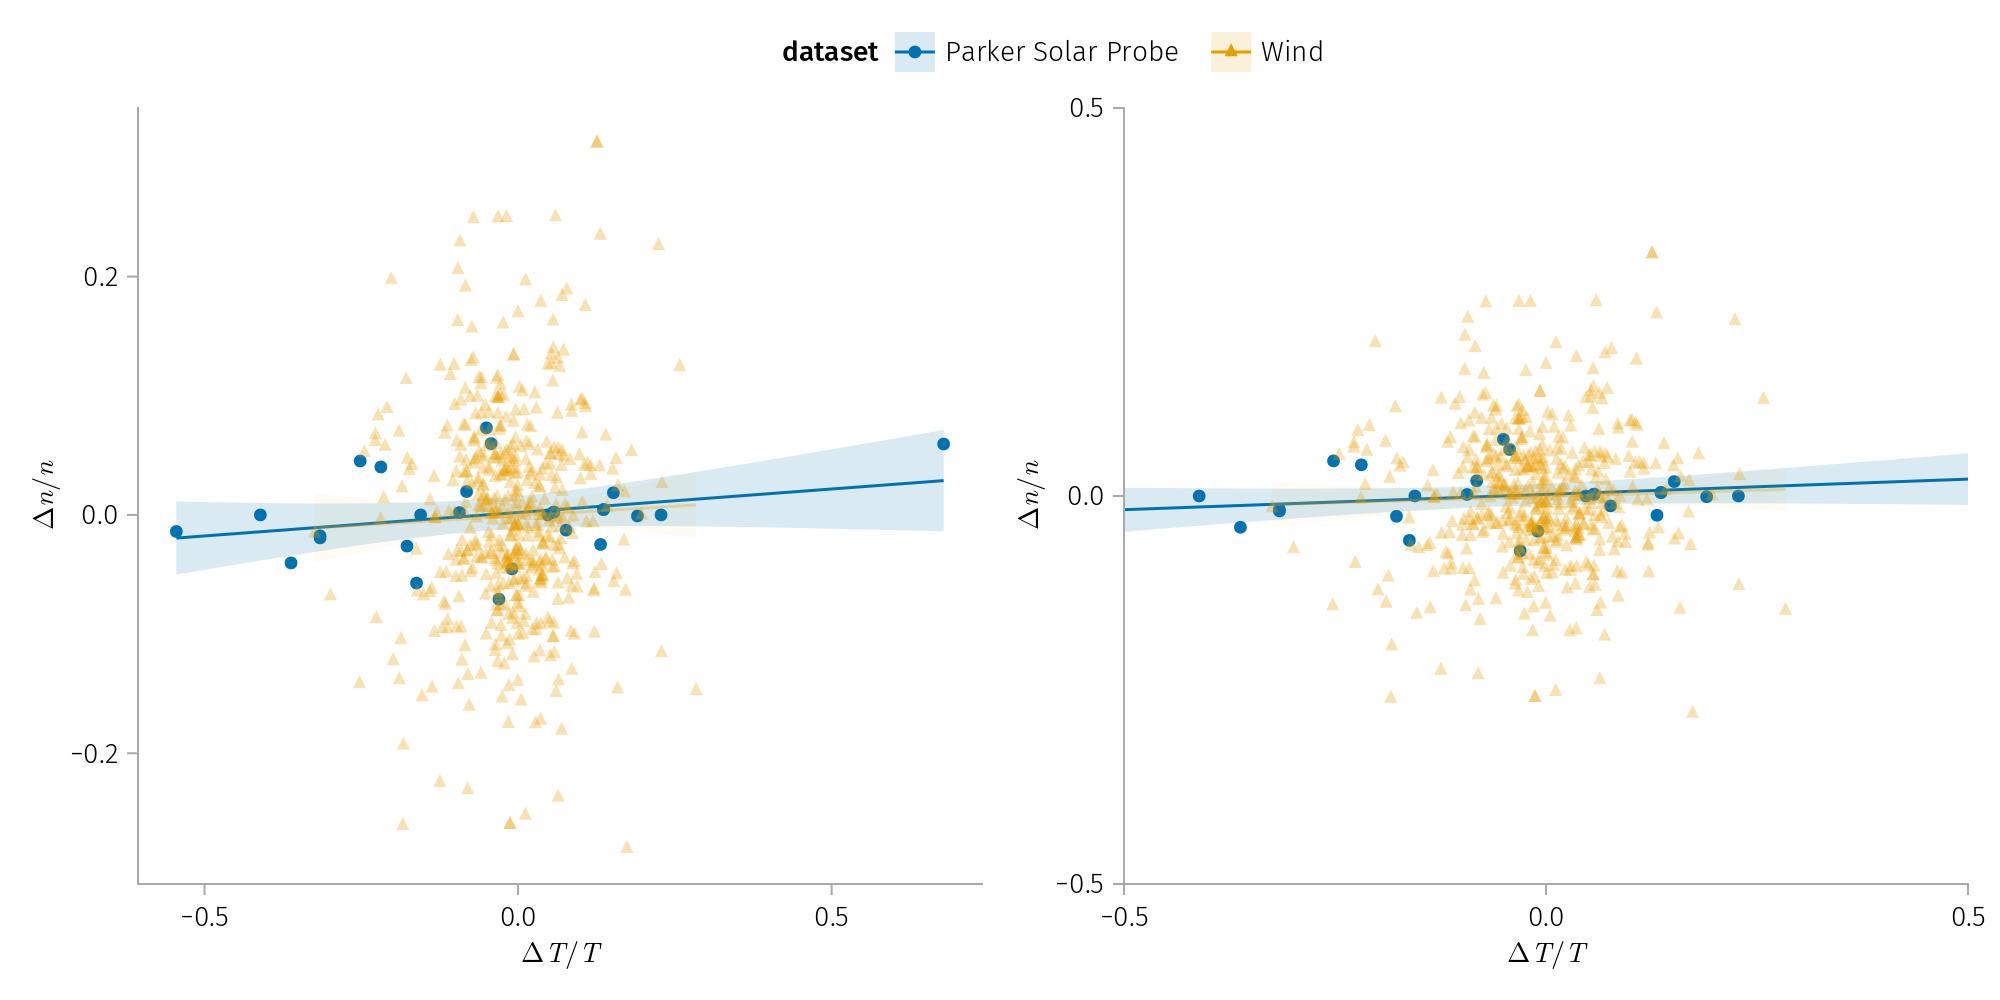

In [56]:
#| label: fig-dn-dT
#| column: screen
begin
    fname = "dn-dT"
    plt = data_layer_a * mapping(dT_over_T, dn_over_n) * (linear() + mapping())

    fig = Figure(size=(1000, 500))
    grid1 = plt |> draw!(fig[2, 1])
    grid2 = plt |> draw!(fig[2, 2]; axis=(; limits=((-0.5, 0.5), (-0.5, 0.5))))

    pretty_legend!(fig, grid1)
    easy_save("$(fname)_$psp_p_instr")

    fig
end

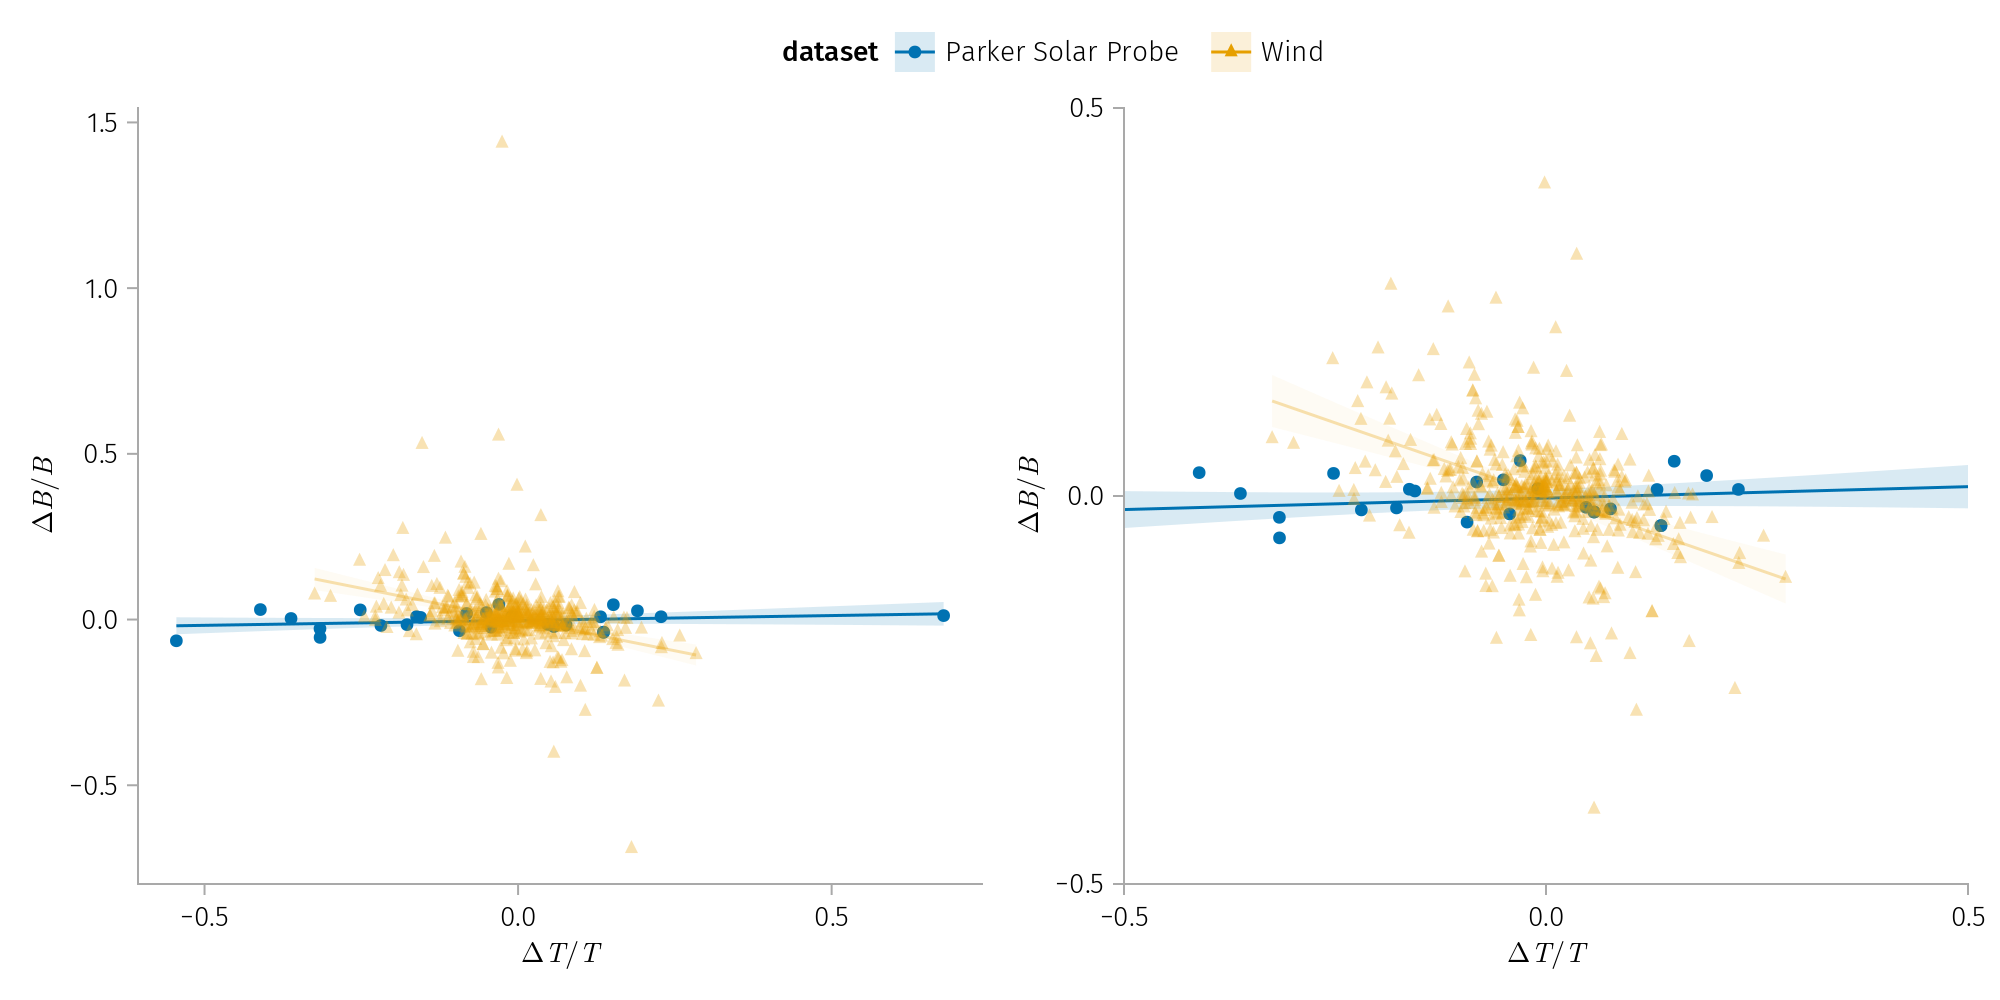

In [57]:
#| label: fig-dT-dB
#| column: screen
begin
    fname = "dT-dB"
    plt = data_layer_a * mapping(dT_over_T, dB_over_B) * (linear() + mapping())

    fig = Figure(size=(1000, 500))
    grid = draw!(fig[2, 1], plt)
    draw!(fig[2, 2], plt, axis=(; limits=((-0.5, 0.5), (-0.5, 0.5))))
    legend!(fig[1, 1:2], grid, titleposition=:left, orientation=:horizontal)

    easy_save("$(fname)_$psp_p_instr")

    fig
end

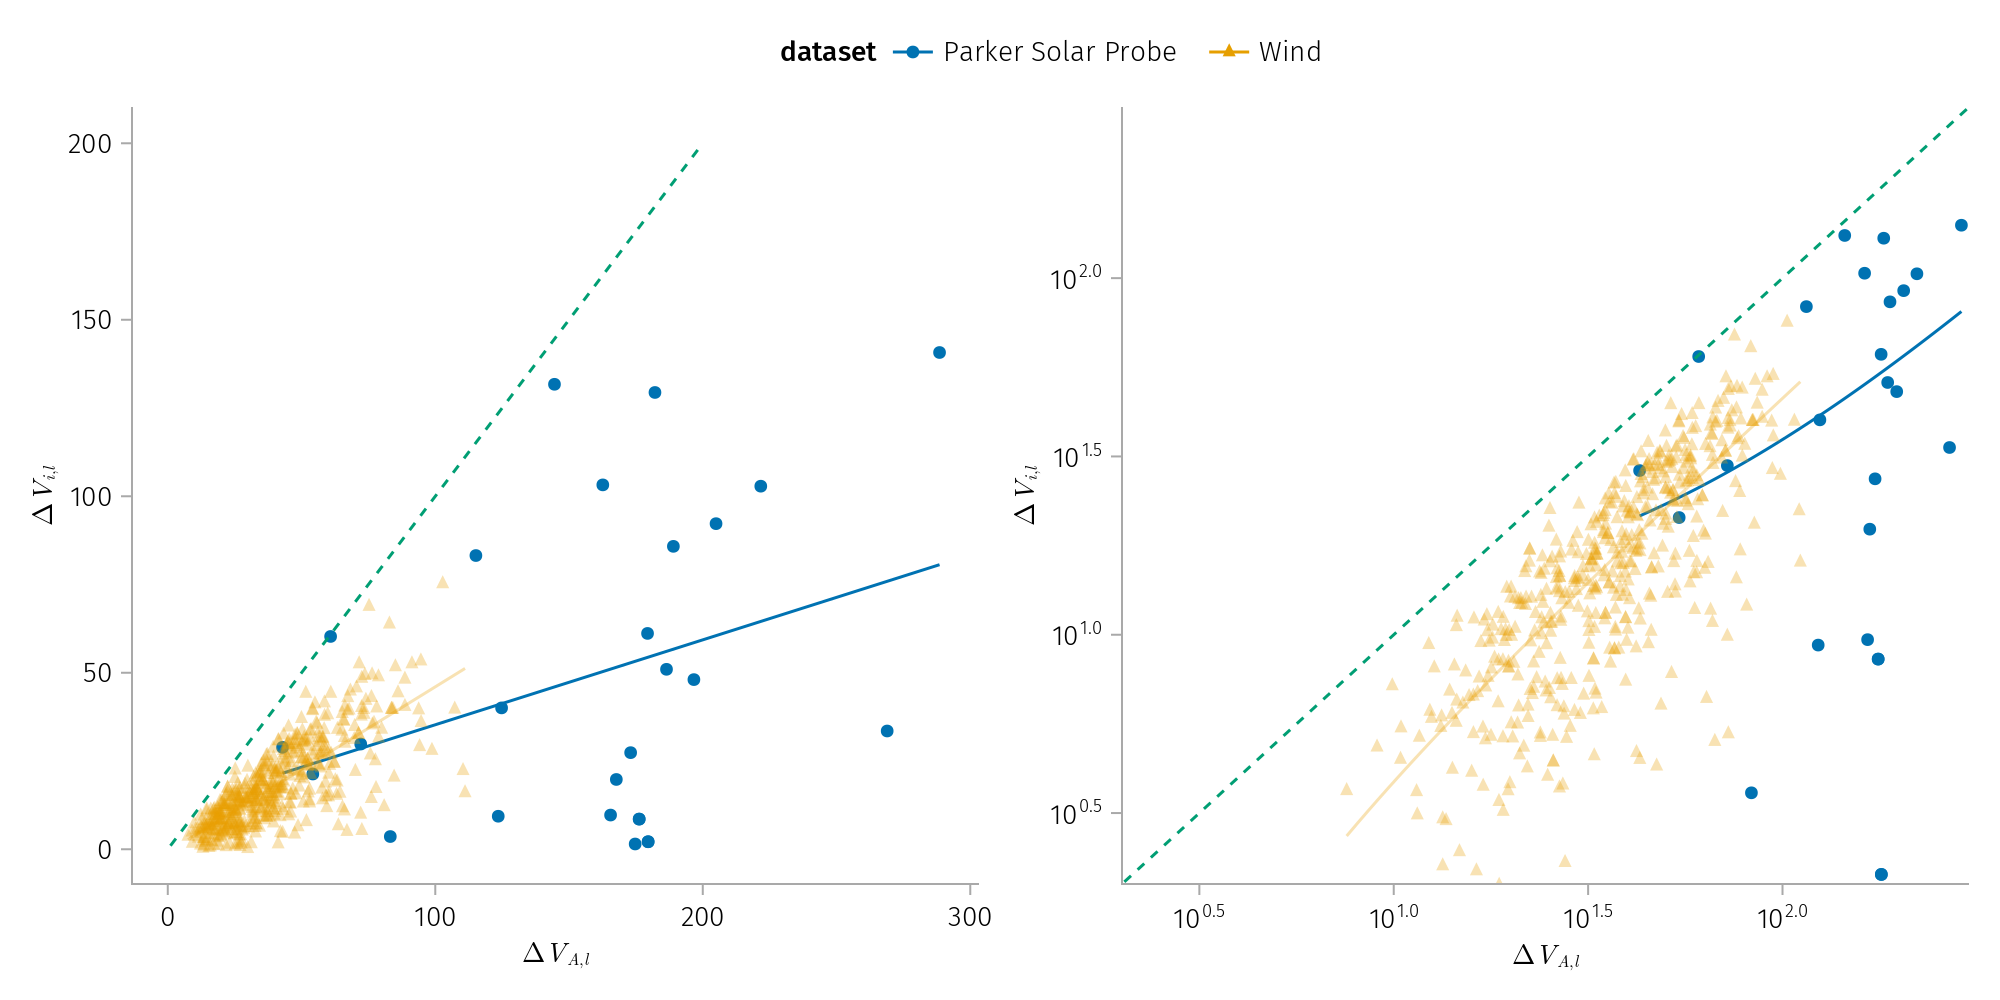

In [58]:
#| label: fig-dvl
#| column: screen
begin
    fname = "dvl"

    v_Alfven_map = "v.Alfven.change.l" => L"\Delta V_{A,l}"
    v_ion_map = "v.ion.change.l" => L"\Delta V_{i,l}"

    plt = data_layer_a * mapping(v_Alfven_map, v_ion_map) * (linear(interval=nothing) + mapping())

    fig = Figure(size=(1000, 500))

    limit_axis = (; limits=((2, 300), (2, 300)))
    axis = merge(log_axis, limit_axis)

    grid1 = plt |> draw!(fig[2, 1])
    lines!(1 .. 200, identity, linestyle=:dash) # add a dashed line with slope 1
    grid2 = plt |> draw!(fig[2, 2]; axis=axis)
    lines!(1 .. 1000, identity, linestyle=:dash) # add a dashed line with slope 1

    pretty_legend!(fig, grid1)

    easy_save("$(fname)_$psp_p_instr")

    fig
end

## Anistropy

In [59]:
#| label: fig-anisotropy
#| column: screen
function plot_anistropy()
    fname = "anisotropy"

    Λ_map = :Λ => L"\Lambda"

    plt = data_layer_a * mapping(Λ_map)

    fig = Figure(size=(1000, 500))
    grid1 = plt * density() |> draw!$fig[2, 1]
    grid2 = plt * histogram() |> draw!$fig[2, 2]

    # easy_save("$(fname)_$psp_p_instr")
    # legend!(fig[1, 1:2], grid, titleposition=:left, orientation=:horizontal)
    pretty_legend!(fig, grid1)

    fig
end

plot_anistropy (generic function with 1 method)

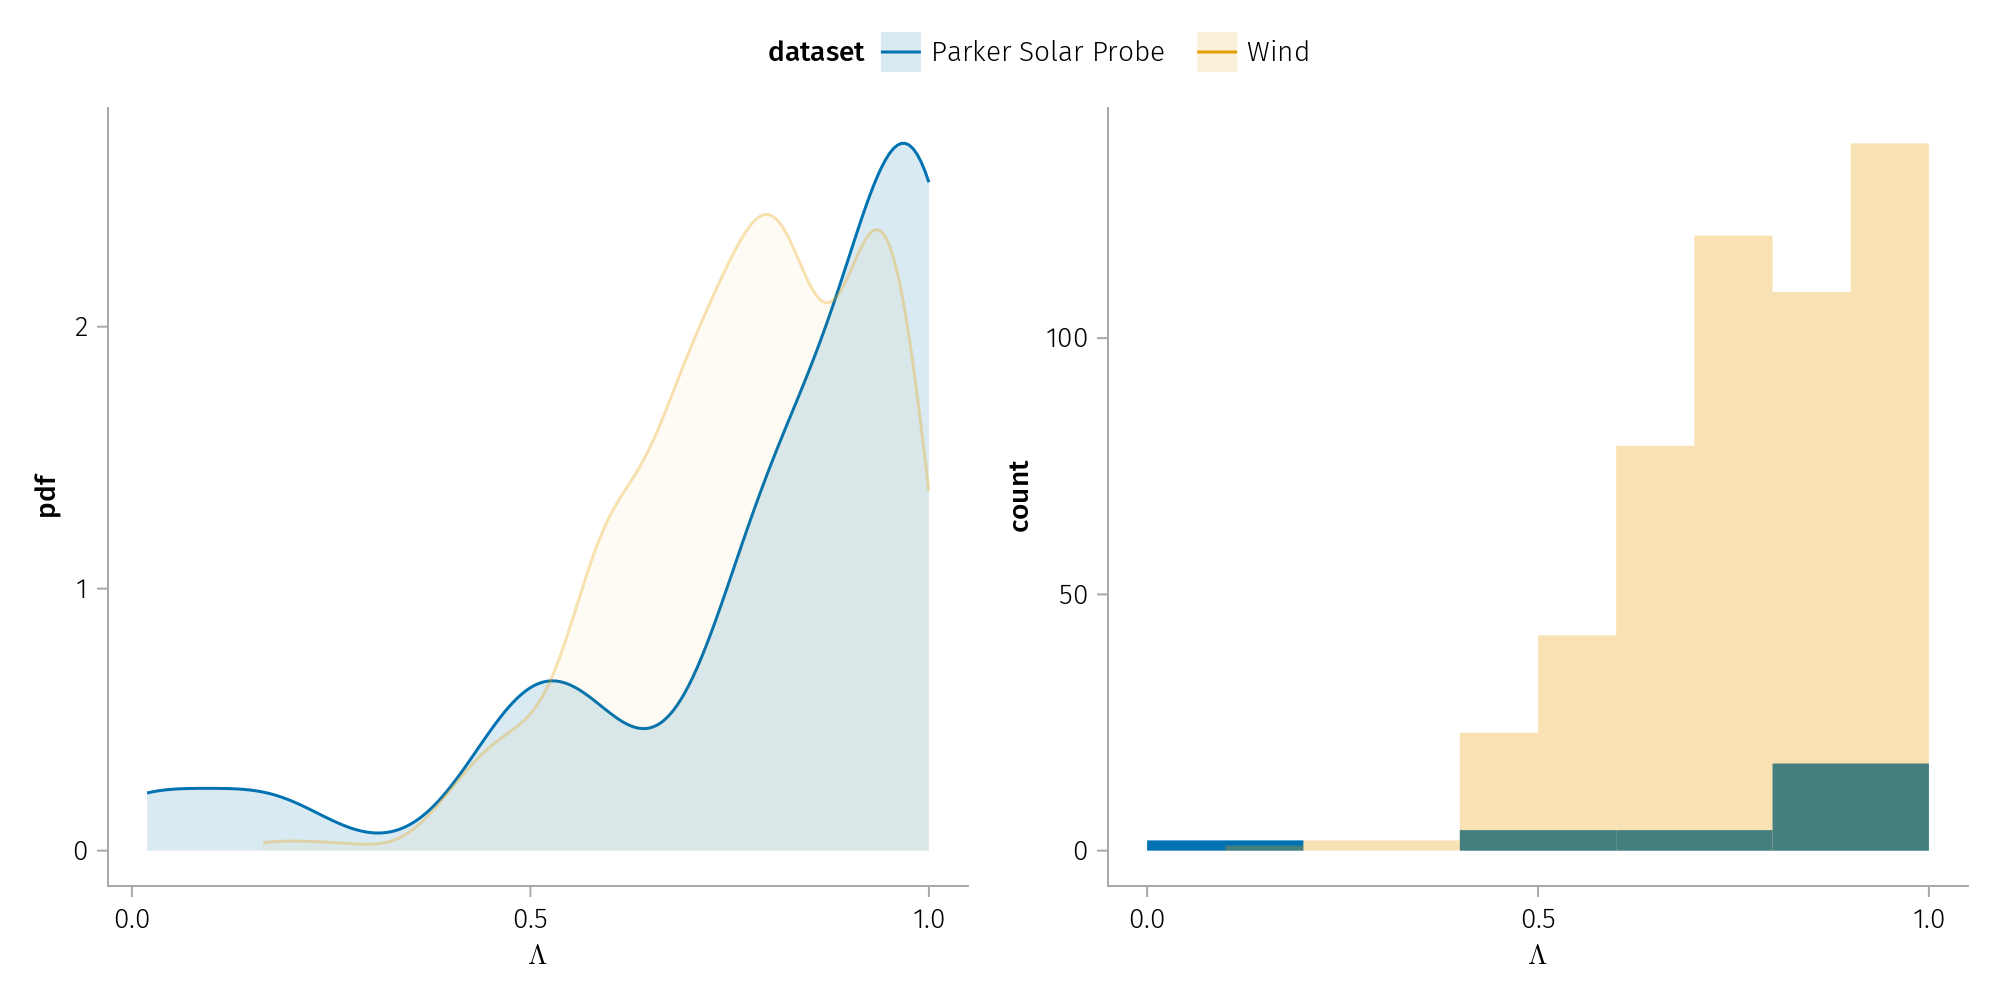

In [60]:
plot_anistropy()